In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")
BiocManager::install('DESeq')
install.packages('statmod')
install.packages("gplots")
install.packages("fastICA")

Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.1 (2019-07-05)
Installing package(s) 'edgeR'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'digest', 'evaluate', 'IRkernel', 'Rcpp', 'repr'
Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.1 (2019-07-05)
Installing package(s) 'DESeq'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Update old packages: 'digest', 'evaluate', 'IRkernel', 'Rcpp', 'repr'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


http://pklab.med.harvard.edu/scw2014/subpop_tutorial.html

In [7]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/fvalle/anaconda3/envs/phd/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=it_IT.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=it_IT.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=it_IT.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=it_IT.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] fastICA_1.2-2       statmod_1.4.32      DESeq_1.36.0       
[4] lattice_0.20-38     locfit_1.5-9.1      Biobase_2.44.0     
[7] BiocGenerics_0.30.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1           RColorBrewer_1.1-2   compiler_3.6.1      
 [4] BiocManager_1.30.4   base6

In [3]:
library(DESeq)
library(statmod)
library(fastICA)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [ ]:
directory <-"/home/fvalle/phd/results/tcga/oversigma_10tissue"

In [9]:
targets <- read.delim("/home/fvalle/phd/results/gtex/protein-coding/files.dat", sep=',', row.names=1)
head(targets)

,primary_site,secondary_site
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,Adipose - Subcutaneous
GTEX-111CU-1826-SM-5GZYN,Adipose Tissue,Adipose - Subcutaneous
GTEX-111FC-0226-SM-5N9B8,Adipose Tissue,Adipose - Subcutaneous
GTEX-111VG-2326-SM-5N9BK,Adipose Tissue,Adipose - Subcutaneous
GTEX-111YS-2426-SM-5GZZQ,Adipose Tissue,Adipose - Subcutaneous
GTEX-1122O-2026-SM-5NQ91,Adipose Tissue,Adipose - Subcutaneous


In [10]:
rawdata <- read.delim("/home/fvalle/phd/results/gtex/protein-coding/mainTable.csv", sep=',', row.names=1)
head(rawdata)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,GTEX.1117F.0226.SM.5GZZ7,GTEX.111CU.1826.SM.5GZYN,GTEX.111FC.0226.SM.5N9B8,GTEX.111VG.2326.SM.5N9BK,GTEX.111YS.2426.SM.5GZZQ,GTEX.1122O.2026.SM.5NQ91,GTEX.1128S.2126.SM.5H12U,GTEX.113IC.0226.SM.5HL5C,GTEX.117YX.2226.SM.5EGJJ,GTEX.11DXW.0326.SM.5H11W,...,GTEX.ZVE2.0006.SM.51MRW,GTEX.ZVP2.0005.SM.51MRK,GTEX.ZVT2.0005.SM.57WBW,GTEX.ZVT3.0006.SM.51MT9,GTEX.ZVT4.0006.SM.57WB8,GTEX.ZVTK.0006.SM.57WBK,GTEX.ZVZP.0006.SM.51MSW,GTEX.ZVZQ.0006.SM.51MR8,GTEX.ZXES.0005.SM.57WCB,GTEX.ZXG5.0005.SM.57WCN
ENSG00000186092,0,0,0,0,2,0,0,0,1,1,...,0,2,1,0,0,0,1,0,2,0
ENSG00000187634,17,30,134,99,17,12,44,92,30,181,...,8,13,3,3,11,11,7,14,9,2
ENSG00000188976,3878,3533,3823,2983,2726,3116,2580,2252,3109,2755,...,582,1948,617,1137,890,1294,772,2020,1187,1543
ENSG00000187961,456,766,840,923,447,600,425,502,886,393,...,365,407,124,328,316,444,148,462,201,713
ENSG00000187583,86,40,48,59,34,9,14,39,30,23,...,43,56,7,19,108,43,33,53,28,92
ENSG00000187642,67,36,33,41,12,18,5,20,38,39,...,19,31,9,36,836,17,15,50,14,14


In [11]:
group <- factor(paste0(targets$primary_site,".",targets$disease_type))

In [12]:
lib.size<-estimateSizeFactorsForMatrix(rawdata)

In [13]:
ed <- t(t(rawdata)/lib.size)

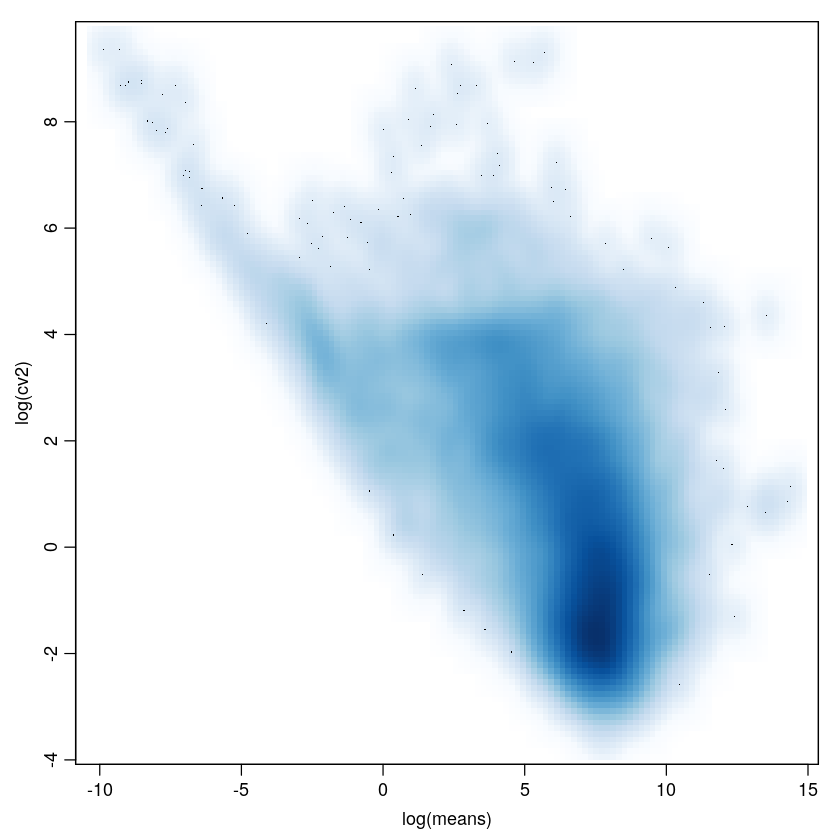

In [14]:
means <- rowMeans(ed)
vars <- apply(ed,1,var)
cv2 <- vars/means^2
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9)
smoothScatter(log(means),log(cv2))

In [47]:
minMeanForFit <- unname( quantile( means[which(cv2>0.01)], .4 ) )
useForFit <- means >= minMeanForFit # & spikeins
fit <- glmgam.fit( cbind( a0 = 1, a1tilde = 1/means[useForFit] ),cv2[useForFit] )
a0 <- unname( fit$coefficients["a0"] )
a1 <- unname( fit$coefficients["a1tilde"])
fit$coefficients

a0    a1tilde 
  3,626551 757,437613

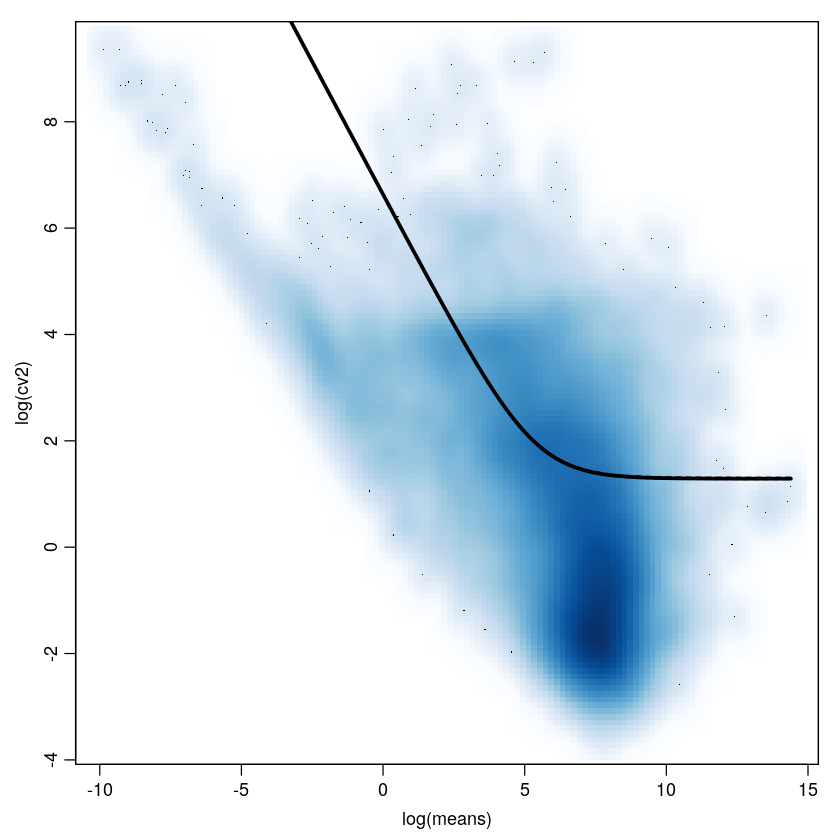

In [69]:
# repeat previous plot
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9); smoothScatter(log(means),log(cv2));
xg <- exp(seq( min(log(means[means>0])), max(log(means)), length.out=1000 ))
vfit <- a1/xg + a0
# add fit line
lines( log(xg), log(vfit), col="black", lwd=3 )
df <- ncol(ed) - 1
# add confidence interval
lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black")
lines(log(xg),log(vfit * qchisq(0.1,df)/df),lty=2,col="black")

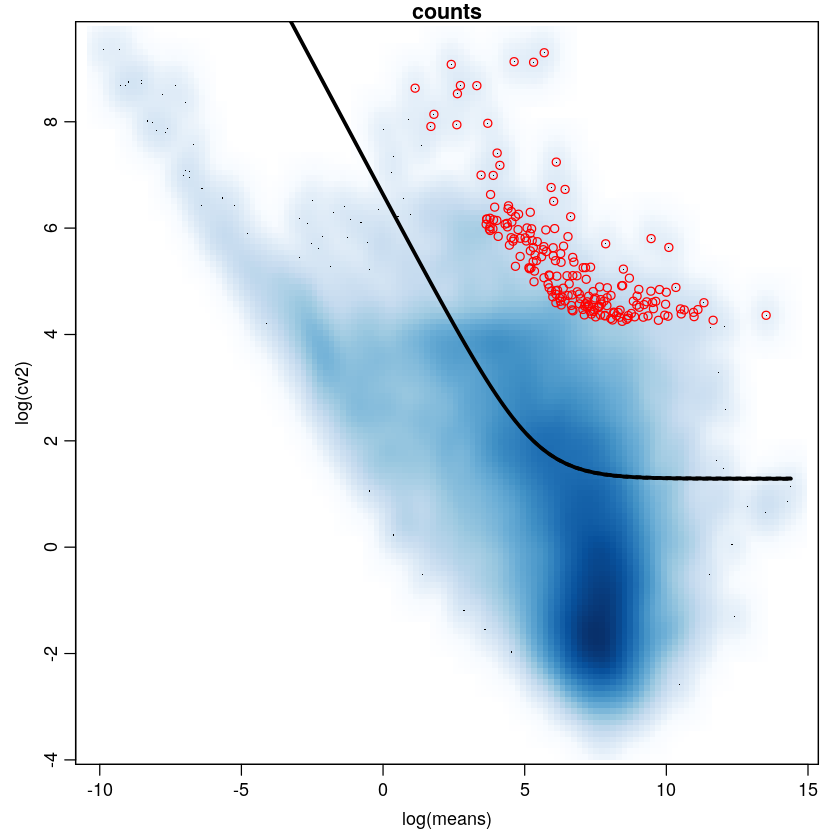

In [91]:
afit <- a1/means+a0
varFitRatio <- vars/(afit*means^2)
varorder <- order(varFitRatio,decreasing=T)
oed <- ed[varorder,]

# repeat previous plot
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9)
smoothScatter(log(means),log(cv2), main="counts"); 
lines(log(xg), log(vfit), col="black", lwd=3 ); 
lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black"); 
lines(log(xg),log(vfit * qchisq(0.025,df)/df),lty=2,col="black");
# add top 100 genes
points(log(means[varorder[1:200]]),log(cv2[varorder[1:200]]),col=2)

In [102]:
m = ncol(rawdata)
fdr=0.0001
testDenom <- (means*a1 + means^2*cv2)/(1+cv2/m)
p <- 1-pchisq(varsGenes * (m-1)/testDenom,m-1)
padj <- p.adjust(p,"BH")
sig <- padj < fdr
sig[is.na(sig)] <- FALSE

In [99]:
names(means)[varorder[1:5]]

[1] "ENSG00000152266" "ENSG00000124233" "ENSG00000124157" "ENSG00000171201"
[5] "ENSG00000167531"

In [104]:
names(means)[sig][1:5]

[1] "ENSG00000163810" "ENSG00000126545" "ENSG00000135222" "ENSG00000126550"
[5] "ENSG00000171209"

In [26]:
#https://github.com/hemberg-lab/scRNA.seq.funcs/blob/master/R/brennecke.R
#https://www.nature.com/articles/nmeth.2645
Brennecke_getVariableGenes <- function(expr_mat, spikes=NA, suppress.plot=FALSE, fdr=0.1, minBiolDisp=0.5) {
        # require(statmod)

        rowVars <- function(x) { unlist(apply(x,1,var))}

        colGenes = "black"
        colSp = "grey35"


        fullCountTable <- expr_mat;

        if (is.character(spikes)) {
                sp = rownames(fullCountTable) %in% spikes;
                countsSp <- fullCountTable[sp,];
                countsGenes <- fullCountTable[!sp,];
        } else if (is.numeric(spikes)) {
                countsSp <- fullCountTable[spikes,];
                countsGenes <- fullCountTable[-spikes,];
        } else {
                countsSp = fullCountTable;
                countsGenes = fullCountTable;
        }

        meansSp = rowMeans(countsSp)
        varsSp = rowVars(countsSp)
        cv2Sp = varsSp/meansSp^2
        meansGenes = rowMeans(countsGenes)
        varsGenes = rowVars(countsGenes)
        cv2Genes = varsGenes/meansGenes^2
        # Fit Model
        minMeanForFit <- unname( quantile( meansSp[ which( cv2Sp > 0.01 ) ], 0.40))
        useForFit <- meansSp >= minMeanForFit
#        if (sum(useForFit) < 50) {
#                warning("Too few spike-ins exceed minMeanForFit, recomputing using all genes.")
#                meansAll = c(meansGenes, meansSp)
#                cv2All = c(cv2Genes,cv2Sp)
#                minMeanForFit <- unname( quantile( meansAll[ which( cv2All > 0.3 ) ], 0.80))
#                useForFit <- meansSp >= minMeanForFit
#        }
        if (sum(useForFit) < 30) {warning(paste("Only", sum(useForFit), "spike-ins to be used in fitting, may result in poor fit."))}
        fit <- glmgam.fit( cbind( a0 = 1, a1tilde = 1/meansSp[useForFit] ), cv2Sp[useForFit] )
        a0 <- unname( fit$coefficients["a0"] )
        a1 <- unname( fit$coefficients["a1tilde"])

        # Test
        psia1theta <- a1
        minBiolDisp <- minBiolDisp^2
        m = ncol(countsSp);
        cv2th <- a0 + minBiolDisp + a0 * minBiolDisp
        testDenom <- (meansGenes*psia1theta + meansGenes^2*cv2th)/(1+cv2th/m)
        p <- 1-pchisq(varsGenes * (m-1)/testDenom,m-1)
        padj <- p.adjust(p,"BH")
        sig <- padj < fdr
        sig[is.na(sig)] <- FALSE
        if (!suppress.plot) {
                plot( meansGenes,cv2Genes, xaxt="n", yaxt="n", log="xy",
                        xlab = "average normalized read count",
                        ylab = "squared coefficient of variation (CV^2)", col="white")
                axis( 1, 10^(-2:5), c( "0.01", "0.1", "1", "10", "100", "1000",
                        expression(10^4), expression(10^5) ) )
                axis( 2, 10^(-2:3), c( "0.01", "0.1", "1", "10", "100","1000" ), las=2 )
                abline( h=10^(-2:1), v=10^(-1:5), col="#D0D0D0", lwd=2 )
                # Plot the genes, use a different color if they are highly variable
                points( meansGenes, cv2Genes, pch=20, cex=.2,
                        col = ifelse( padj < .1, "#C0007090", colGenes ) )
		points( meansSp, cv2Sp, pch=20, cex=.5, col="blue1")
                # Add the technical noise fit
                xg <- 10^seq( -2, 6, length.out=1000 )
                lines( xg, (a1)/xg + a0, col="#FF000080", lwd=3 )
                # Add a curve showing the expectation for the chosen biological CV^2 thershold
                lines( xg, psia1theta/xg + a0 + minBiolDisp, lty="dashed", col="#C0007090", lwd=3)
        }
        return(names(meansGenes)[sig])
}


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“27 x values <= 0 omitted from logarithmic plot”

[1] "ENSG00000160072" "ENSG00000067606" "ENSG00000149527" "ENSG00000116254"
   [5] "ENSG00000097021" "ENSG00000215788" "ENSG00000171608" "ENSG00000130940"
   [9] "ENSG00000171819" "ENSG00000116661" "ENSG00000177674" "ENSG00000175206"
  [13] "ENSG00000120937" "ENSG00000028137" "ENSG00000162493" "ENSG00000162438"
  [17] "ENSG00000142615" "ENSG00000142627" "ENSG00000117115" "ENSG00000169991"
  [21] "ENSG00000188257" "ENSG00000162551" "ENSG00000219073" "ENSG00000142789"
  [25] "ENSG00000173372" "ENSG00000159189" "ENSG00000173369" "ENSG00000179163"
  [29] "ENSG00000142661" "ENSG00000158022" "ENSG00000117676" "ENSG00000175793"
  [33] "ENSG00000253368" "ENSG00000142748" "ENSG00000000938" "ENSG00000126709"
  [37] "ENSG00000130775" "ENSG00000162511" "ENSG00000121769" "ENSG00000168528"
  [41] "ENSG00000121753" "ENSG00000121905" "ENSG00000187513" "ENSG00000020129"
  [45] "ENSG00000116863" "ENSG00000119535" "ENSG00000163874" "ENSG00000183386"
  [49] "ENSG00000183520" "ENSG00000116983" "ENSG00000168389" "ENSG00000049089"
  [53] "ENSG00000084070" "ENSG00000117016" "ENSG00000126091" "ENSG00000173846"
  [57] "ENSG00000117472" "ENSG00000117481" "ENSG00000117480" "ENSG00000142973"
  [61] "ENSG00000184313" "ENSG00000162409" "ENSG00000184292" "ENSG00000158966"
  [65] "ENSG00000116675" "ENSG00000116678" "ENSG00000116704" "ENSG00000050628"
  [69] "ENSG00000154027" "ENSG00000137959" "ENSG00000162618" "ENSG00000122417"
  [73] "ENSG00000016602" "ENSG00000117228" "ENSG00000183347" "ENSG00000240038"
  [77] "ENSG00000243480" "ENSG00000143028" "ENSG00000143119" "ENSG00000143110"
  [81] "ENSG00000171385" "ENSG00000118729" "ENSG00000183508" "ENSG00000203859"
  [85] "ENSG00000134240" "ENSG00000143127" "ENSG00000159164" "ENSG00000014914"
  [89] "ENSG00000143369" "ENSG00000163131" "ENSG00000163141" "ENSG00000213190"
  [93] "ENSG00000143375" "ENSG00000143367" "ENSG00000159409" "ENSG00000143365"
  [97] "ENSG00000143631" "ENSG00000143520" "ENSG00000143536" "ENSG00000169509"
 [101] "ENSG00000203786" "ENSG00000163207" "ENSG00000169474" "ENSG00000163209"
 [105] "ENSG00000169469" "ENSG00000241794" "ENSG00000203785" "ENSG00000203782"
 [109] "ENSG00000163220" "ENSG00000163221" "ENSG00000143546" "ENSG00000196754"
 [113] "ENSG00000189334" "ENSG00000185499" "ENSG00000143622" "ENSG00000132698"
 [117] "ENSG00000196189" "ENSG00000160781" "ENSG00000163472" "ENSG00000125462"
 [121] "ENSG00000132692" "ENSG00000143320" "ENSG00000163563" "ENSG00000162706"
 [125] "ENSG00000132693" "ENSG00000177807" "ENSG00000143318" "ENSG00000179914"
 [129] "ENSG00000186517" "ENSG00000143217" "ENSG00000158859" "ENSG00000158869"
 [133] "ENSG00000158874" "ENSG00000158887" "ENSG00000143226" "ENSG00000173110"
 [137] "ENSG00000203747" "ENSG00000162747" "ENSG00000188404" "ENSG00000034971"
 [141] "ENSG00000010165" "ENSG00000116147" "ENSG00000057252" "ENSG00000157064"
 [145] "ENSG00000116701" "ENSG00000143341" "ENSG00000116690" "ENSG00000090104"
 [149] "ENSG00000081237" "ENSG00000116852" "ENSG00000163395" "ENSG00000081277"
 [153] "ENSG00000118194" "ENSG00000159166" "ENSG00000159173" "ENSG00000163435"
 [157] "ENSG00000170075" "ENSG00000143847" "ENSG00000133048" "ENSG00000182004"
 [161] "ENSG00000184144" "ENSG00000133069" "ENSG00000117266" "ENSG00000117280"
 [165] "ENSG00000162896" "ENSG00000182795" "ENSG00000196878" "ENSG00000123689"
 [169] "ENSG00000117595" "ENSG00000136643" "ENSG00000143499" "ENSG00000117791"
 [173] "ENSG00000186205" "ENSG00000203685" "ENSG00000154358" "ENSG00000143632"
 [177] "ENSG00000135801" "ENSG00000135744" "ENSG00000086619" "ENSG00000077522"
 [181] "ENSG00000198626" "ENSG00000179456" "ENSG00000115705" "ENSG00000134317"
 [185] "ENSG00000196208" "ENSG00000163032" "ENSG00000143867" "ENSG00000115884"
 [189] "ENSG00000084674" "ENSG00000115138" "ENSG00000084731" "ENSG00000171303"
 [193] "ENSG00000084693" "ENSG00000138100" "ENSG00000158019" "ENSG00000013016"
 [197] "ENSG00000152154" "ENSG00000183023" "ENSG00000171132" "ENSG00000119888"
 [201] "ENSG00000243244" "ENSG00000179915" "ENSG00000

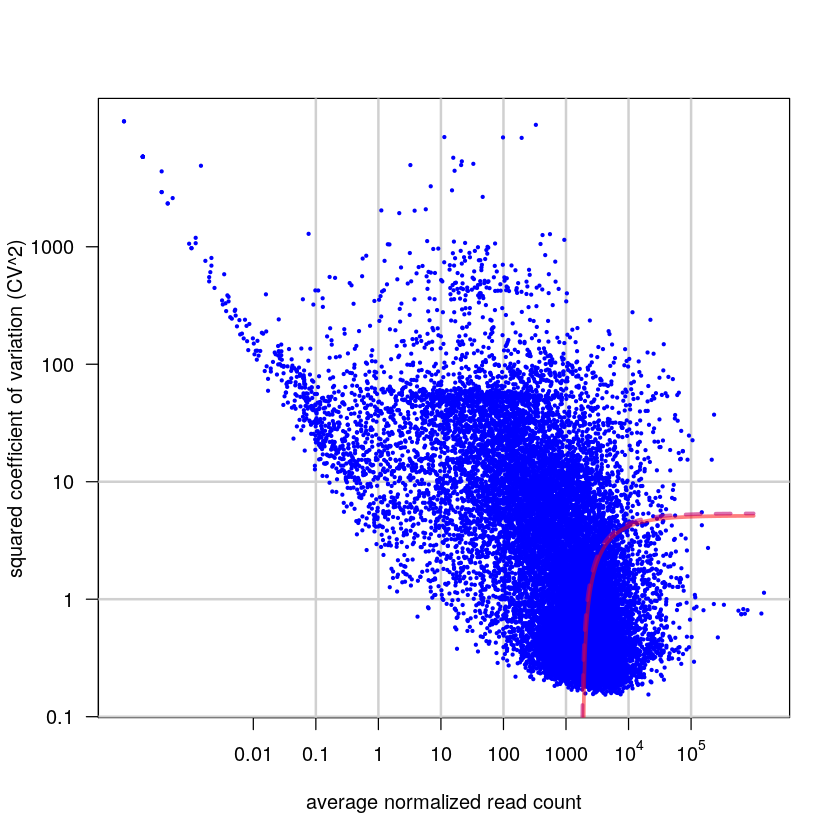

In [27]:
Brennecke_getVariableGenes(rawdata)